In [1]:
# 弹幕泳道管理类

In [121]:
import cv2
import numpy as np
from PIL import Image,ImageDraw,ImageFont
import math
import random

In [3]:
# 定义类

class Danmu_track:
    
    def __init__(self,text_list,w,h,color=(255,0,255,255),size=40,speed=10):
        """
        构造方法
        @param text_list list 本泳道文字列表
        @param w,h int 泳道宽度和高度
        @param color tuple 泳道文字颜色
        @param size int 文字大小
        @param speed int 文字速度（像素/帧）
        """
        #文字列表
        self.text_list = text_list
        #画面宽度
        self.w = w
        # 画面高度
        self.h = h
        # 字体颜色
        self.color = color
        # 字体大小
        self.size = size
        # 速度
        self.speed = speed
        
        # 背景
        self.bg = self.create_bg()
        
        # 文字列表转长字符
        self.long_text = self.text_list_str()
        
       
        
    def create_bg(self):
        """
        绘制透明背景图
        
        @return Image
        """
        return Image.new("RGBA",(self.w,self.h),(255,0,255,50))
    
    def generate_blanks(self,num):
        """
        生成指定数量的空格字符
        """
        str = ""
        for i in range(num):
            str += " "
        return str
    
    
    def text_list_str(self):
        """
        文字列表转为字符
        """
        text_str = ""
        for text in self.text_list:
            text_str += (text + self.generate_blanks(10))
            
        return text_str
    
    def create_frame(self,frame_index):
        """
        绘制第frame_index 帧位置的泳道画面
        """
        
        # 添加背景图
        bg = self.bg.copy()
        
        # 添加文字
        d = ImageDraw.Draw(bg)
        font  = ImageFont.truetype('./fonts/MSYH.ttc',self.size,encoding="utf-8")
        offset = 100 - frame_index * self.speed
        
        d.text((offset,10),self.long_text,font=font,fill=self.color)
        
        return bg

In [4]:
text_list = ['恩培','你好','计算机视觉']

In [5]:
track = Danmu_track(text_list,400,100,speed=10)

In [7]:
# 弹幕层管理类

In [122]:
class Danmu_layer:
    """
    输出第X帧的弹幕画面
    """
    def __init__(self,text_path,frame_w,frame_h):
        """
        构造方法
        
        @param text_path str 弹幕文本路径
        @param frame_w,frame_h int 画面宽度和高度
        """
        # 弹幕文本路径
        self.text_path = text_path
        self.frame_w = frame_w
        self.frame_h  = frame_h
        
        # 轨道高度
        self.track_h = 100
        # 轨道数量
        self.track_num = int( frame_h / self.track_h)
        
        
        # 分配的文字
        self.text_arr = self.distribute_text()
        
        # 创建多个弹幕轨道实例
        self.danmu_track_obj_list = []
        
        # 创建颜色库、速度库
        speed_list = [2,4,6,8]
        color_list = [(255,255,255,255),(255,0,0,255),(255,0,255,255),(0,255,0,255)]
        
        for track_id in range(self.track_num):
            color = random.choice(color_list)
            speed = random.choice(speed_list)
            danmu_obj = Danmu_track(self.text_arr[track_id],self.frame_w,100,color=color,speed=speed)
            self.danmu_track_obj_list.append(danmu_obj)
            
        # 大图
        self.bg = self.create_bg()

        
    def create_bg(self):
        """
        创建透明大图
        """
        return Image.new("RGBA",(self.frame_w,self.frame_h),(255,0,255,50))
    
    def text_to_list(self):
        """
        弹幕文本转为list
        @return text_list list 文本列表
        """
        text_list = None
        with open(self.text_path,'r') as f:
            text_list = [f.strip() for f in f.readlines()] 
        return text_list
    
    
    def distribute_text(self):
        """
        将弹幕文本转为numpy 数组
        
        """
        text_list = self.text_to_list()
        # 文本长度
        text_len = len(text_list)
        
        #轨道数量
        track_num = self.track_num
        
        # 列数（单个轨道最多放多少个元素）
        track_max_num = math.ceil(text_len / self.track_num) 
        
        # 举证元素数量
        elements_num = track_num * track_max_num
        # 创建索引矩阵
        indexes_arr = np.arange(elements_num).reshape(track_max_num,track_num)
        # 转置
        indexes_arr_trans = indexes_arr.T
        
        # 将文字列表空位补成""
        append_blanks = ["" for i in range( (elements_num - text_len))]
        
        final_text_list =np.concatenate((text_list,append_blanks))
        
        return final_text_list[indexes_arr_trans]
    
    def generate_frame(self,frame_index):
        """
        绘制第frame_index 帧的弹幕层
        """
        bg = self.bg.copy()
        # 遍历轨道
        
        for track_id,track_obj in enumerate(self.danmu_track_obj_list):
            img = track_obj.create_frame(frame_index)
            bg.paste(img,(0, self.track_h *track_id ))
            
        return bg
        
      

In [125]:
text_path = 'danmu_real.txt'
layer = Danmu_layer(text_path,800,500)

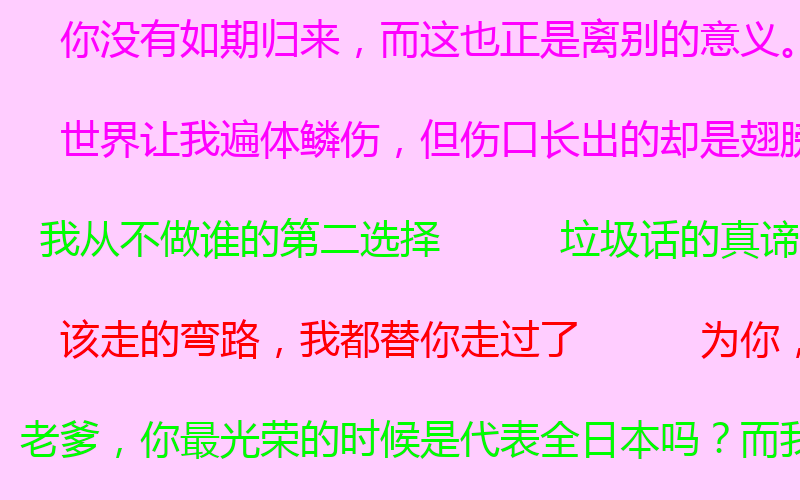

In [127]:
layer.generate_frame(10)